In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.impute import SimpleImputer

In [27]:
df = pd.read_csv('heart_disease.csv')

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [29]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [30]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
# Fill missing values : 

In [36]:
imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(df[['ca', 'thal']])
df[['ca', 'thal']] = data

In [37]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
# Data Encoding & Standarize Numerical Features 

In [43]:
def encode_categoricals(df, special_categoricals=['sex','cp','fbs','restecg','exang','slope','ca','thal']):
    df = df.copy()
    
    # Force special categoricals to category dtype if present
    for col in special_categoricals:
        if col in df.columns:
            df[col] = df[col].astype('category')
    
    # Detect categorical columns
    categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
    
    # Detect numeric columns
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    
    # Remove target/label columns from both lists
    for col in ['target','num']:
        if col in categorical_cols: categorical_cols.remove(col)
        if col in numeric_cols: numeric_cols.remove(col)
    
    # --- OneHotEncode categorical columns ---
    if categorical_cols:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded = encoder.fit_transform(df[categorical_cols])
        encoded_df = pd.DataFrame(
            encoded,
            columns=encoder.get_feature_names_out(categorical_cols),
            index=df.index
        )
    else:
        encoded_df = pd.DataFrame(index=df.index)  # empty
    
    # --- Standardize numeric columns ---
    if numeric_cols:
        scaler = StandardScaler()
        scaled = scaler.fit_transform(df[numeric_cols])
        scaled_df = pd.DataFrame(
            scaled,
            columns=numeric_cols,
            index=df.index
        )
    else:
        scaled_df = pd.DataFrame(index=df.index)  # empty
    
    # --- Combine everything ---
    df_processed = pd.concat(
        [scaled_df, encoded_df, df.drop(columns=numeric_cols+categorical_cols)], axis=1
    )
    
    return df_processed

In [44]:
df_processed = encode_categoricals(df)

print("Original shape:", df.shape)
print("Processed shape:", df_processed.shape)
df_processed.head()

Original shape: (303, 14)
Processed shape: (303, 29)


,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,num
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
# Exploratory Data Analysis (EDA)

In [ ]:
# 1. Histograms (distribution of each feature)

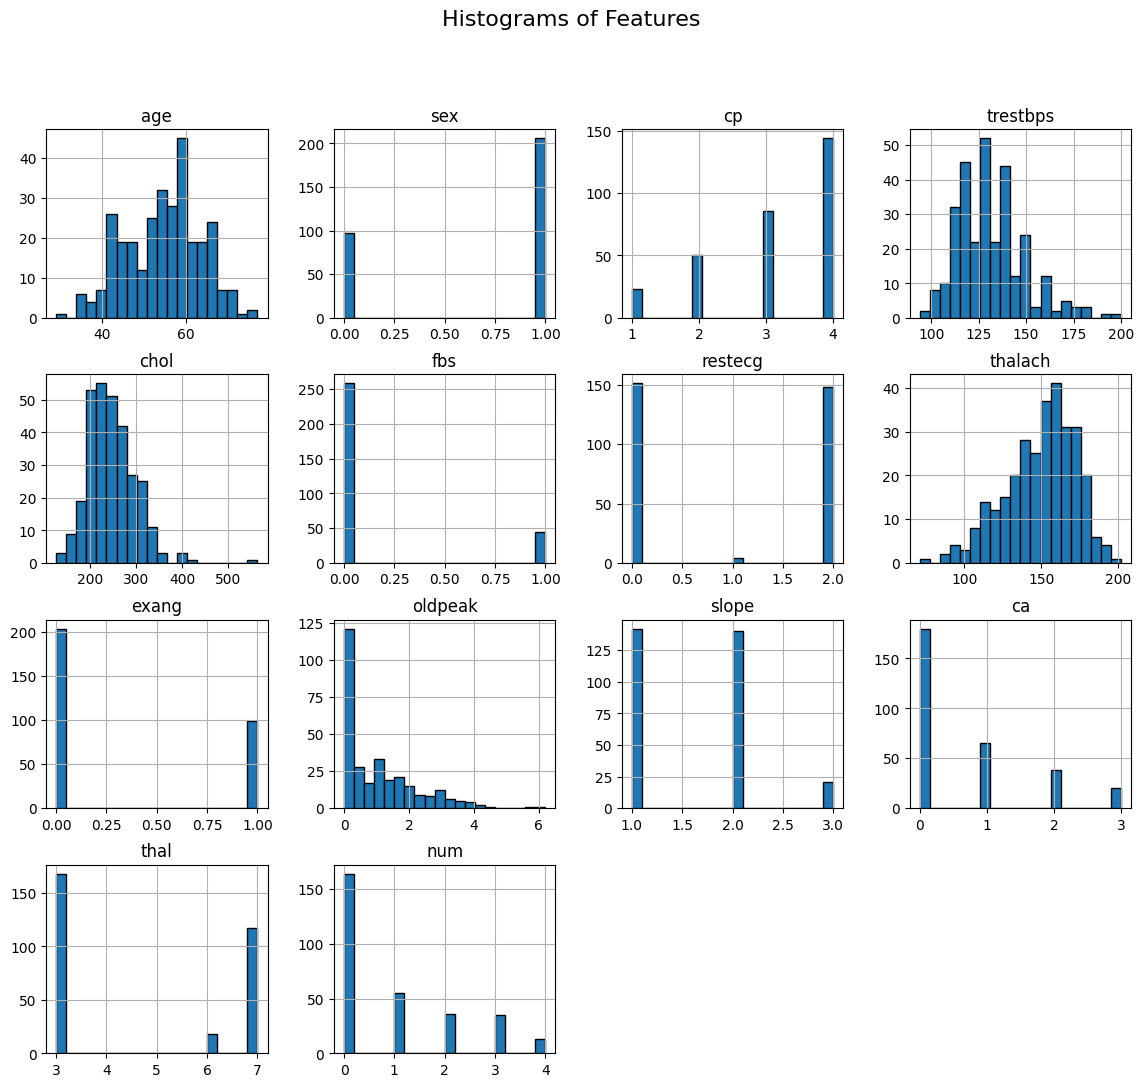

In [46]:
df.hist(figsize=(14,12), bins=20, edgecolor="black")
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

In [ ]:
# 2. Correlation Heatmap (relationships between numeric variables)

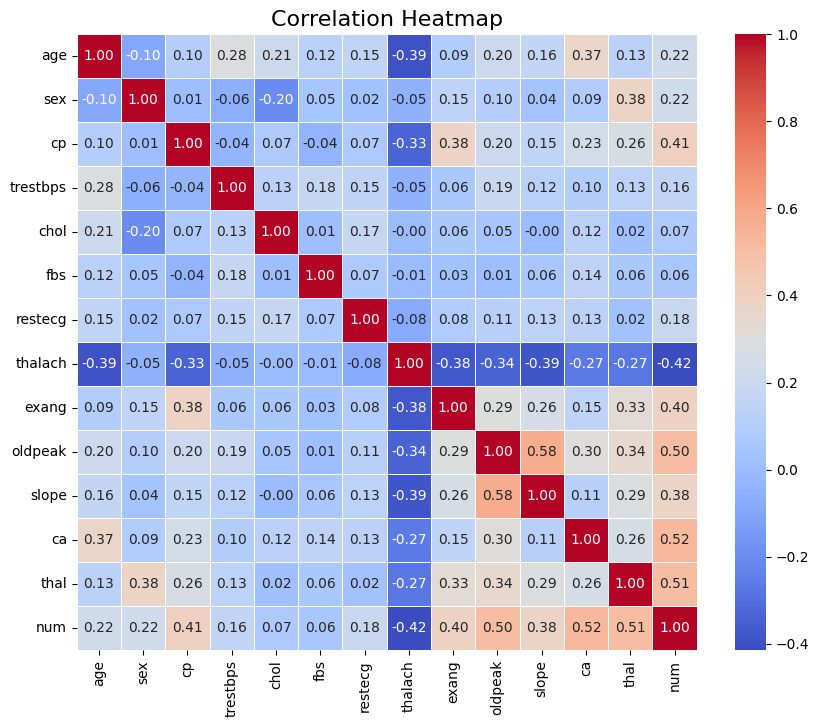

In [47]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
# 3. Boxplots (distribution of features across target classes)

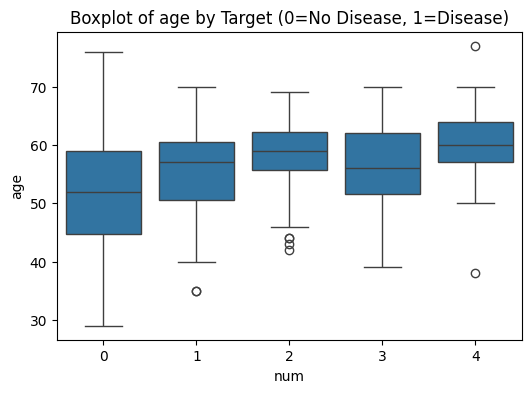

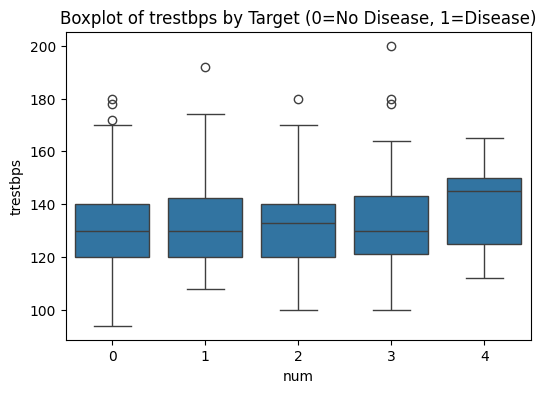

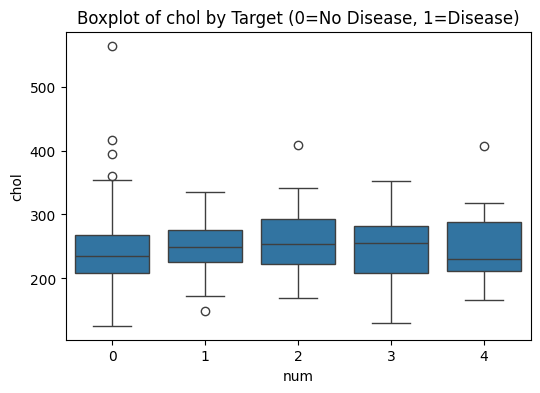

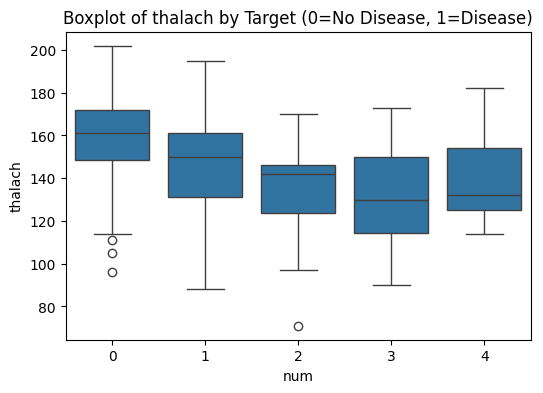

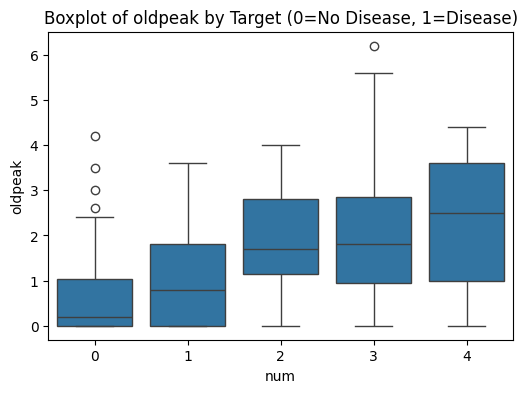

In [49]:
numeric_cols = ['age', 'trestbps','chol','thalach','oldpeak']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='num', y=col, data=df)
    plt.title(f"Boxplot of {col} by Target (0=No Disease, 1=Disease)", fontsize=12)
    plt.show()

In [ ]:
# Countplots for categorical features

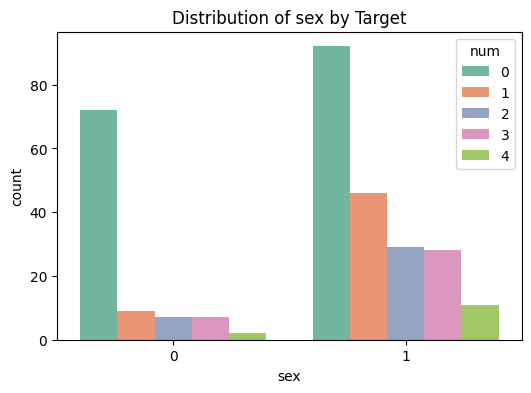

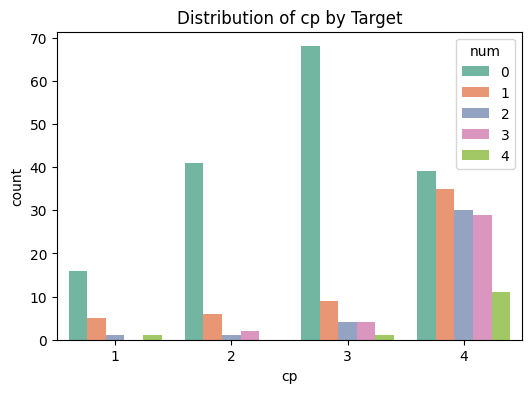

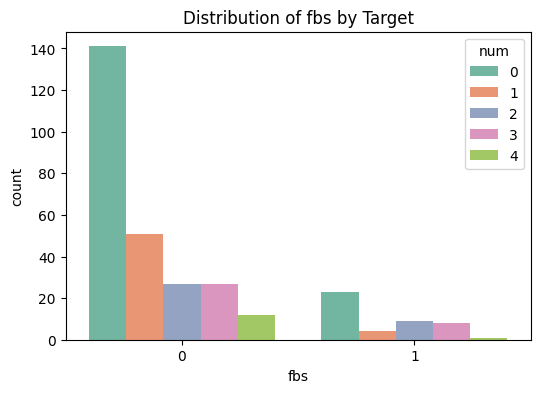

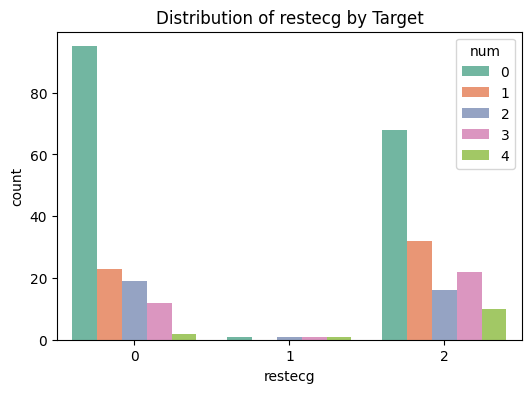

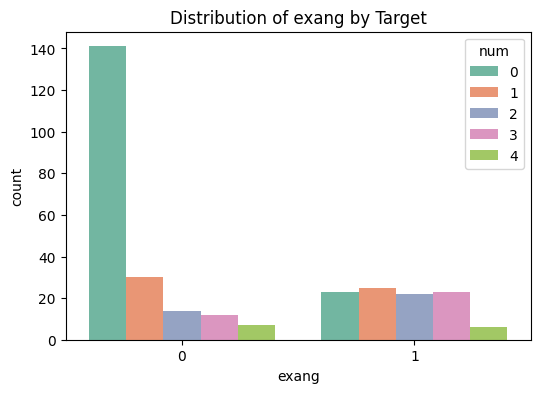

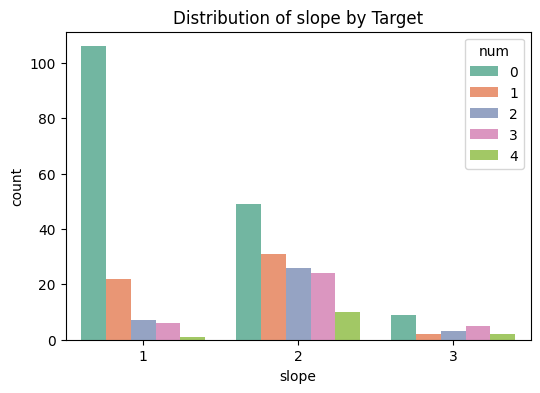

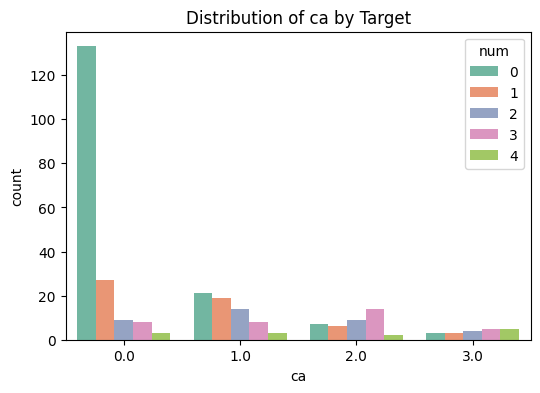

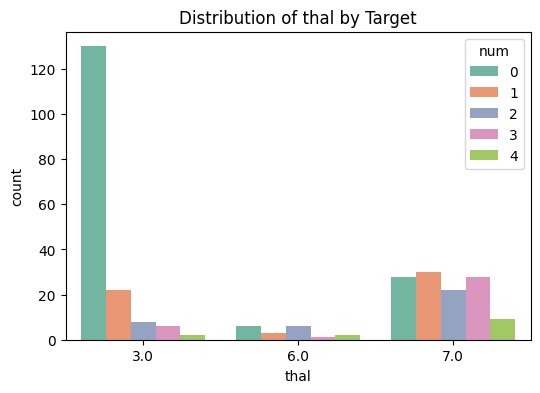

In [50]:
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='num', data=df, palette='Set2')
    plt.title(f"Distribution of {col} by Target", fontsize=12)
    plt.show()

In [51]:
df_processed.to_csv("processed_dataset.csv", index=False)